In [1]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import copy
import tqdm

In [2]:
graph_data = torch.load("ttbar_uncorr_pu200_dumpv5_acorn2.0.0_module_map_minmax_event000000844.pyg", map_location="cpu")
graph_data

Data(hit_loc_phi_2=[200348], hit_cluster_x_2=[200348], hit_count_2=[200348], hit_loc_phi_1=[200348], hit_cluster_r_2=[200348], hit_localDir0_1=[200348], hit_count_1=[200348], hit_localDir0_2=[200348], hit_module_id=[200348], hit_id=[200348], hit_glob_phi_2=[200348], hit_cluster_y_1=[200348], hit_eta_angle_1=[200348], hit_region=[200348], hit_eta=[200348], hit_localDir1_2=[200348], hit_norm_x_1=[200348], hit_lengthDir1_2=[200348], hit_glob_eta_1=[200348], hit_charge_count_2=[200348], hit_cluster_y_2=[200348], hit_cluster_phi_2=[200348], hit_cluster_z_2=[200348], hit_cluster_r_1=[200348], hit_localDir2_2=[200348], hit_norm_y_1=[200348], hit_z=[200348], hit_cluster_eta_1=[200348], hit_cluster_eta_2=[200348], hit_localDir2_1=[200348], hit_lengthDir2_1=[200348], hit_x=[200348], hit_r=[200348], hit_eta_angle_2=[200348], hit_cluster_x_1=[200348], hit_glob_eta_2=[200348], hit_lengthDir0_1=[200348], hit_cluster_z_1=[200348], hit_phi=[200348], hit_lengthDir0_2=[200348], hit_norm_z_1=[200348], hi

In [3]:
graph_data.is_pixel = graph_data.hit_r < 375
graph_data.edge_index_pixel = graph_data.edge_index[:, graph_data.is_pixel[graph_data.edge_index[0]] & graph_data.is_pixel[graph_data.edge_index[1]] ]
graph_data.track_edges_pixel = graph_data.track_edges[:, graph_data.is_pixel[graph_data.track_edges[0]] & graph_data.is_pixel[graph_data.track_edges[1]] ]

In [4]:
graph_data.edge_index_pixel.shape[1], graph_data.track_edges_pixel.shape[1]

(321989, 64485)

In [5]:
def hist_2d_edge_density(key, bins=20):
    avg_eta = 0.5 * (graph_data.hit_eta[graph_data[key][0]] + graph_data.hit_eta[graph_data[key][1]])
    avg_phi = (torch.exp(1j * graph_data.hit_phi[graph_data[key][0]]) + torch.exp(1j * graph_data.hit_phi[graph_data[key][1]])).angle()
    r = plt.hist2d(avg_eta, avg_phi, bins=(bins,bins), cmap="Blues")
    plt.colorbar()
    plt.title(key)
    plt.xlabel("$\\eta$")
    plt.ylabel("$\\varphi$")
    return r

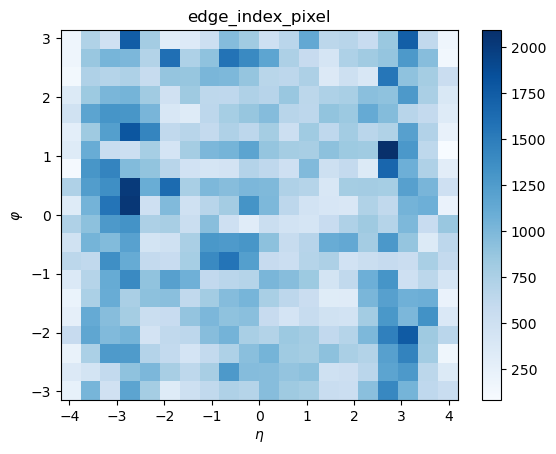

In [6]:
edge_index_density, _, _, _ = hist_2d_edge_density("edge_index_pixel")

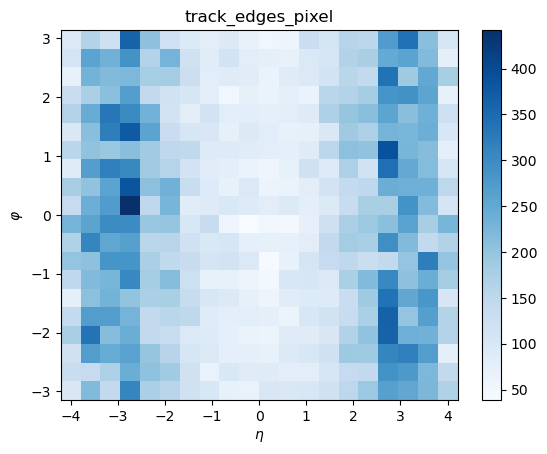

In [7]:
track_edges_density, _, _, _ = hist_2d_edge_density("track_edges_pixel")

In [8]:
def imshow(a):
    plt.imshow(a.T, cmap="Blues")
    plt.colorbar()
    plt.xlabel("$\\eta$")
    plt.ylabel("$\\varphi$")

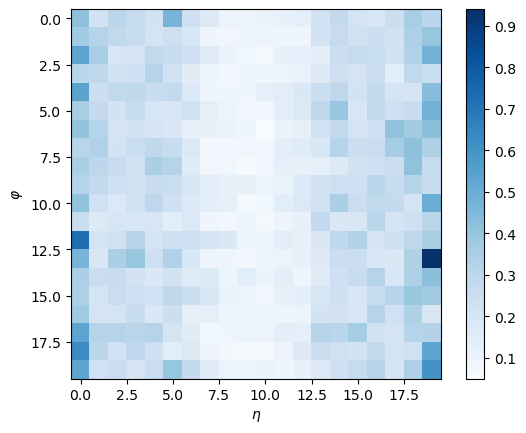

In [9]:
imshow(track_edges_density / edge_index_density)

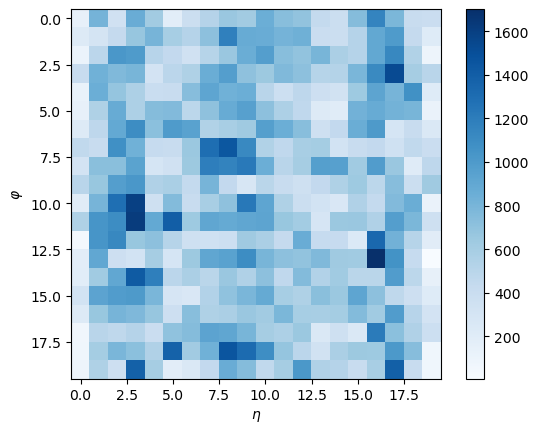

In [10]:
imshow(edge_index_density - track_edges_density)

In [11]:
import sys

In [13]:
sys.path.append("build/")

In [14]:
from graph_pruning import filterEdges

In [15]:
node_weights = [ 1 if r < 370 else 2 for r in graph_data.hit_r ]

In [21]:
newSrc, newDst = filterEdges(graph_data.edge_index[0].numpy().tolist(),
                             graph_data.edge_index[1].numpy().tolist(),
                             node_weights, 7)
1 - (len(newSrc) / len(graph_data.edge_index[0])), len(graph_data.edge_index[0]) - len(newSrc)

(0.0989979610517292, 40882)